Overview of the Gold Price Trends via Machine Learning

1. Objective: Predict gold prices (GLD) using machine learning algorithms.
2. Dataset Features:
   - Date: Timestamp for each entry.
   - SPX: S&P 500 index, representing overall market performance.
   - GLD: Gold ETF, directly reflecting gold prices.
   - USO: Crude oil price ETF, impacting inflation and gold prices.
   - SLV: Silver ETF, which often moves in correlation with gold.
   - EUR/USD: Euro to USD exchange rate, affecting gold prices in global markets.
3. Data Preprocessing: Handling missing values, scaling numerical features.
4. Feature Engineering: Creating new features like rolling averages or lagged variables.
5. Model Selection: Algorithms like Linear Regression or Random Forest.
6. Model Evaluation: Using metrics like Mean Squared Error (MSE).
7. Prediction: Forecasting future gold prices based on input features.
8. Goal: Help investors and traders make informed decisions on gold investments.
9. Data Analysis: Understanding relationships between gold, oil, silver, and currency.
10. Outcome: Provide valuable insights into gold price trends.

In [12]:
#IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# Loading the data
data = pd.read_csv('gold_price_data.csv')

In [6]:
# print first five rows
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# print last five rows
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#Rows and columns
data.shape

(2290, 6)

In [11]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
#checking for null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
#Split the data into features and  target
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [16]:
#Split the data into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [17]:
#Create a Model
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
#Predict the model
prediction = model.predict(X_test)

In [21]:
#Calculating the R-Squared error from the predicted value
error_score = metrics.r2_score(Y_test, prediction)
print("R squared error : ", error_score*100)

R squared error :  98.99599651798574


In [22]:
#Comparing the Actual Values and the Predicted Values : 
Y_test = list(Y_test)

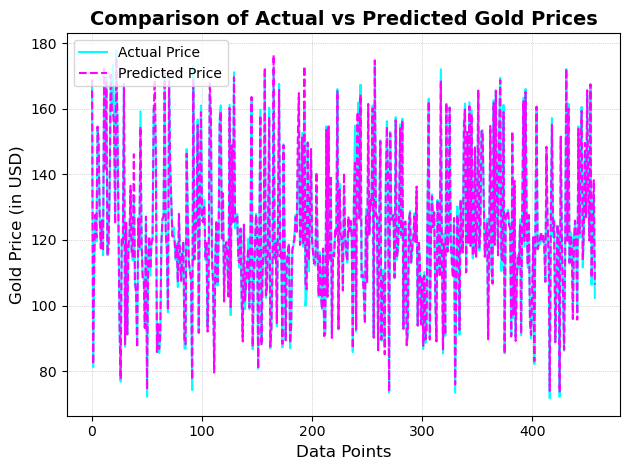

In [34]:
plt.plot(Y_test, color='cyan', linestyle='-', label='Actual Price')  
plt.plot(prediction, color='magenta', linestyle='--', label='Predicted Price') 
plt.title('Comparison of Actual vs Predicted Gold Prices', fontsize=14, fontweight='bold')  # Updated title
plt.xlabel('Data Points', fontsize=12, fontweight='medium')
plt.ylabel('Gold Price (in USD)', fontsize=12, fontweight='medium')  
plt.legend(loc='upper left') 
plt.grid(True, which='both', linestyle=':', linewidth=0.5) 
plt.tight_layout()  
plt.show()
